In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Impact_music_mental_health.csv to Impact_music_mental_health.csv


In [ ]:
import warnings

warnings.filterwarnings('ignore')
sns.set(color_codes = True)
sns.set_palette(palette = 'magma', n_colors = 8)

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Impact_music_mental_health.csv']))
df

In [ ]:
df.shape


(736, 33)

In [ ]:
df.info()

In [ ]:
data=df
data.describe().T

## data.describe() is a Pandas DataFrame method that generates various summary statistics for the numeric columns in the DataFrame 'data',
## such as count, mean, standard deviation, minimum, and maximum values.
## T is used to transpose the resulting DataFrame. Transposing a DataFrame means swapping rows and columns, effectively making the columns become rows and vice versa. This is often done for better readability, especially when the summary statistics are meant to be viewed horizontally rather than vertically.

,count,mean,std,min,25%,50%,75%,max
Age,735.0,2.520680e+01,1.205497e+01,10.0,18.0,21.0,28.0,89.0
Hours per day,736.0,3.572758e+00,3.028199e+00,0.0,2.0,3.0,5.0,24.0
BPM,629.0,1.589948e+06,3.987261e+07,0.0,100.0,120.0,144.0,999999999.0
Anxiety,736.0,5.837636e+00,2.793054e+00,0.0,4.0,6.0,8.0,10.0
Depression,736.0,4.796196e+00,3.028870e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,736.0,3.738451e+00,3.088689e+00,0.0,1.0,3.0,6.0,10.0
OCD,736.0,2.637228e+00,2.842017e+00,0.0,0.0,2.0,5.0,10.0


In [ ]:
data.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [ ]:
data.describe(exclude='number').T
## it is not numerical values , so here there isn't mean,max,... . because it's exclude numbers, so it is categorical only

In [ ]:
## removing outliers , considering their treshholds
age_index = data[(data['Age'] > 70)].index
data = data.drop(age_index, axis=0)

hpd_index = data[data['Hours per day'] >= 15].index
data = data.drop(hpd_index, axis=0)


data_index = data[data['BPM'] > 200].index
data = data.drop(data_index, axis=0)

In [ ]:
corr_data = data.corr()['Age']
corr_data.sort_values()

sns.heatmap(data.corr())

## corrolation is just for numerical data.

In [ ]:
data.drop(['Timestamp', 'Permissions'], axis=1, inplace=True)

## the inplace=True parameter is used to specify whether the changes should be applied directly to the original DataFrame 'data' (if inplace=True) or whether a new DataFrame with the changes should be returned, leaving the original 'data' unchanged (if inplace=False, which is the default).

In [ ]:
data.shape

(714, 31)

In [ ]:
corr_data

Age              1.000000
Hours per day   -0.098354
BPM             -0.019868
Anxiety         -0.147222
Depression      -0.087602
Insomnia         0.039365
OCD             -0.123097
Name: Age, dtype: float64

In [ ]:
plt.figure(figsize=(10,9))
sns.heatmap(data.corr(),cmap="Accent", annot=True)

In [ ]:
data.isnull().sum()

In [ ]:
data['Age'] = data['Age'].fillna(round(data['Age'].mean(), 0))
## uses the round() function to round the mean value to 0 decimal places, effectively converting it into an integer.

data['Primary streaming service'] = data['Primary streaming service'].fillna(data['Primary streaming service'].mode()[0])
## [0] means:  is used to access the first element (the mode with the highest frequency)

data['While working'] = data['While working'].fillna(data['While working'].mode()[0])
data['Instrumentalist'] = data['Instrumentalist'].fillna(data['Instrumentalist'].mode()[0])
data['Composer'] = data['Composer'].fillna(data['Composer'].mode()[0])
data['Foreign languages'] = data['Foreign languages'].fillna(data['Foreign languages'].mode()[0])
data['Music effects'] = data['Music effects'].fillna(data['Music effects'].mode()[0])


## for missing value, for example for Age we use Mean, but for he others we use Mode , most ferequent value approach
## we remove the missing values exept BPM

In [ ]:
data.isnull().sum()

In [ ]:
## for removing the missing value of BPM

miss_bpm = data[data['BPM'].isnull() == True]
miss_bpm

miss_bpm['Fav genre'].unique()

miss_bpm_genre = ['Country', 'Hip hop', 'Pop', 'Rock', 'Metal', 'Classical',
       'Video game music', 'R&B', 'Folk', 'Jazz', 'EDM', 'Gospel',
       'K pop', 'Rap']

for i in miss_bpm_genre:
  data['BPM'] = data['BPM'].fillna(round(data[data['Fav genre']== i ]['BPM'].mean(), 0)) # masalan mean e BPM vase sabke Country

## for any i ,data will change to mean value

## addressing missing values in the 'BPM' (beats per minute) column based on the 'Fav genre' (favorite genre) column. Here's a breakdown of the code:

# miss_bpm = data[data['BPM'].isnull() == True]: This line creates a new DataFrame called 'miss_bpm' by selecting rows from the original 'data' DataFrame where the 'BPM' column has missing (NaN) values.

# miss_bpm: This line simply displays the 'miss_bpm' DataFrame, showing the rows with missing 'BPM' values.

# miss_bpm['Fav genre'].unique(): This line extracts the unique values in the 'Fav genre' column for the rows with missing 'BPM' values in the 'miss_bpm' DataFrame. This is done to determine which genres are associated with missing BPM values.

# miss_bpm_genre: This appears to be a predefined list of music genres.

# The code then enters a loop that iterates through each genre in the 'miss_bpm_genre' list:

# data['BPM'] = data['BPM'].fillna(round(data[data['Fav genre'] == i]['BPM'].mean(), 0)): For each genre 'i' in the list, this line calculates the mean BPM value for that genre and rounds it to 0 decimal places using the round() function. It then fills missing BPM values in the 'BPM' column of the original 'data' DataFrame with this calculated mean value.
# In summary, this code identifies rows with missing BPM values, determines the unique genres associated with those rows, and then fills in the missing BPM values for each genre with the mean BPM for that specific genre. It's a way to impute missing BPM values based on the preferred music genre of each entry in the dataset.

In [ ]:
data

In [ ]:

df = data.copy()

<Axes: xlabel='Age', ylabel='Count'>

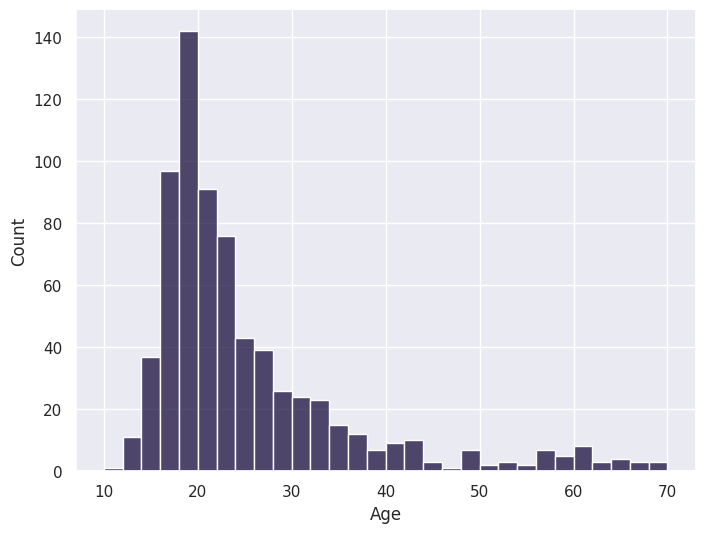

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data['Age'])

Text(0.5, 0, 'EDM Music')

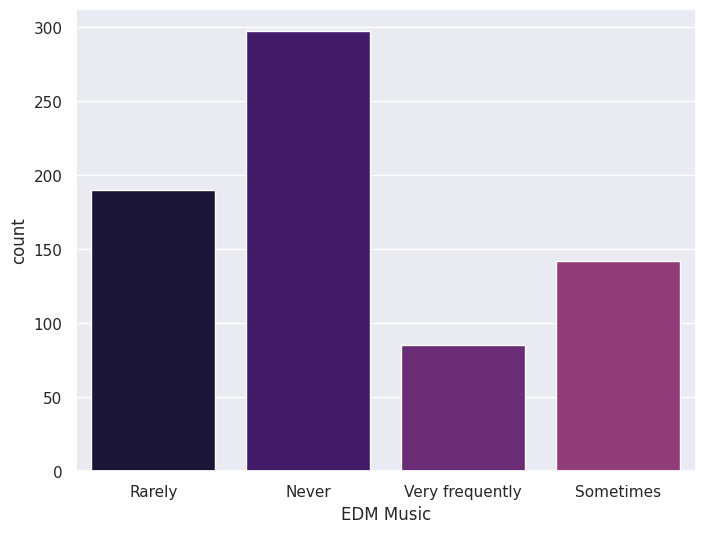

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['Frequency [EDM]'])
plt.xlabel('EDM Music')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

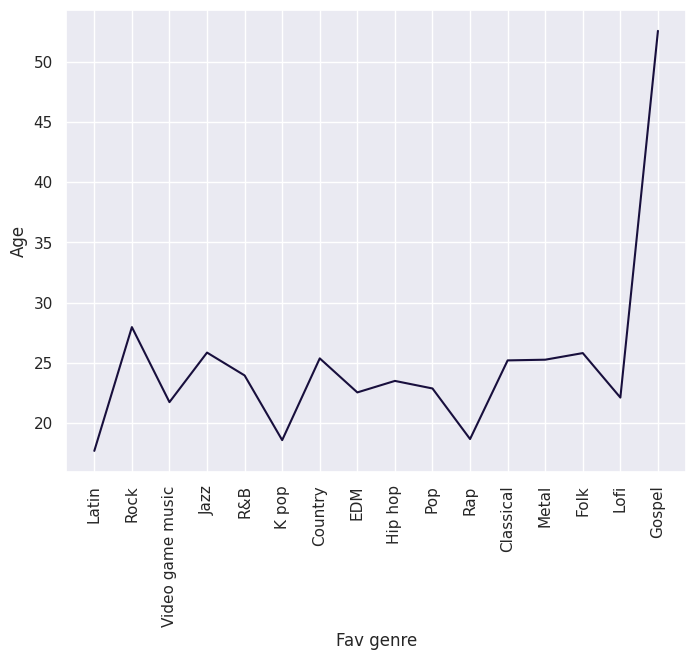

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(x=data['Fav genre'], y=data['Age'], ci=None)
plt.xticks(rotation=90)
## shows which age perefer which genre of music

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

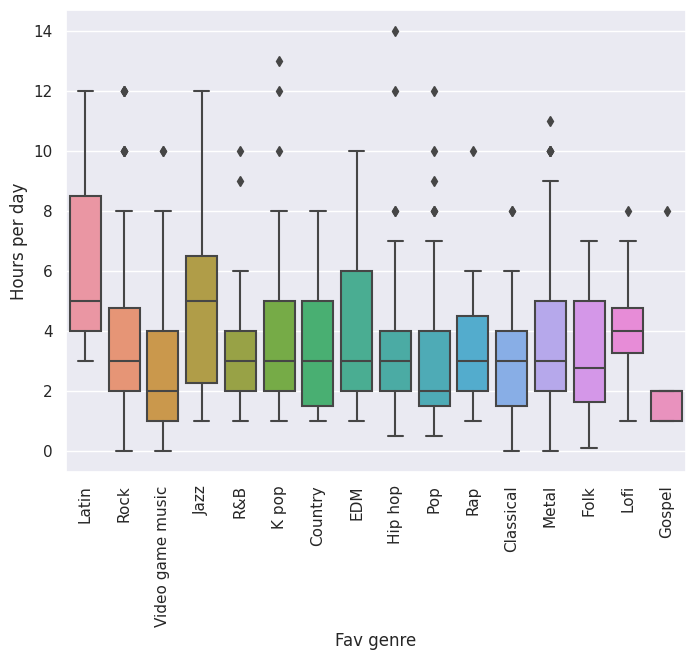

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Fav genre'], y=data['Hours per day'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

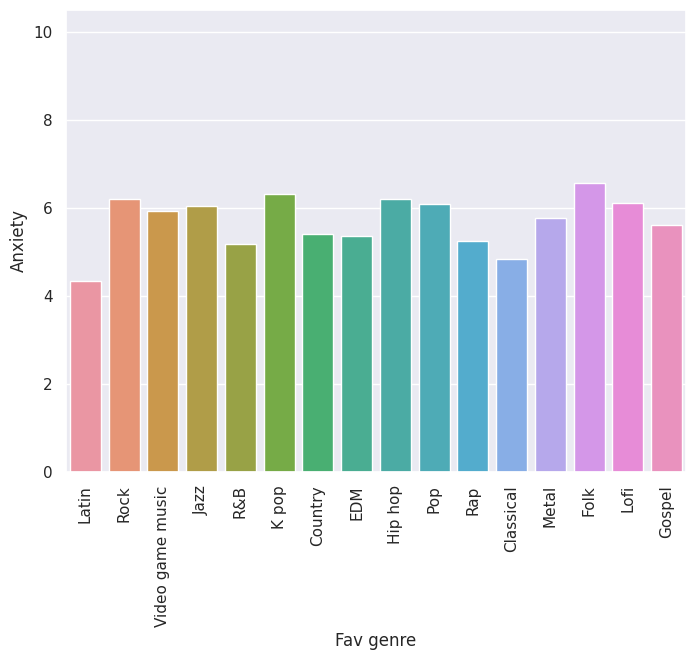

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['Fav genre'], y=data['Anxiety'], errwidth=0)
plt.xticks(rotation=90)
## mitunim jaye Anxiety chizaye dge hame bezarim

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

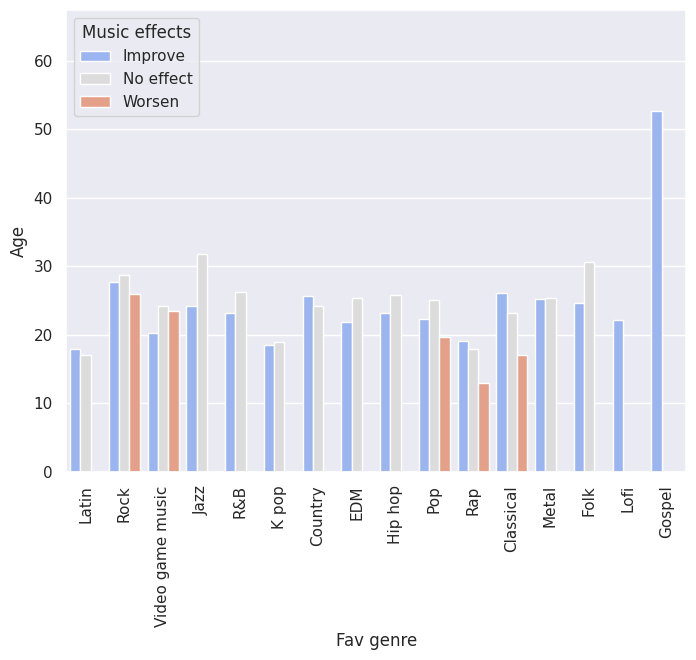

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['Fav genre'], y=data['Age'], hue=data['Music effects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)
## in stead of 'coolwarm' we can use 'hot' then the color will change
## inja masalan tu janre Rock 3 ta music effect ro darim, behtare ke 2 ta parametri begirim be jaye 3 ta parametri

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

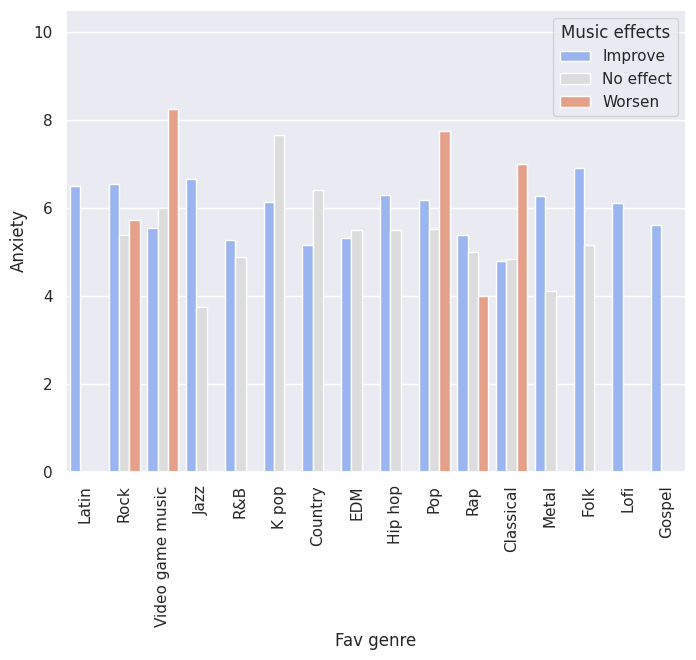

In [ ]:
## which genre of music have a better impact on disease

plt.figure(figsize=(8,6))
sns.barplot(x=data['Fav genre'], y=data['Anxiety'], hue=data['Music effects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

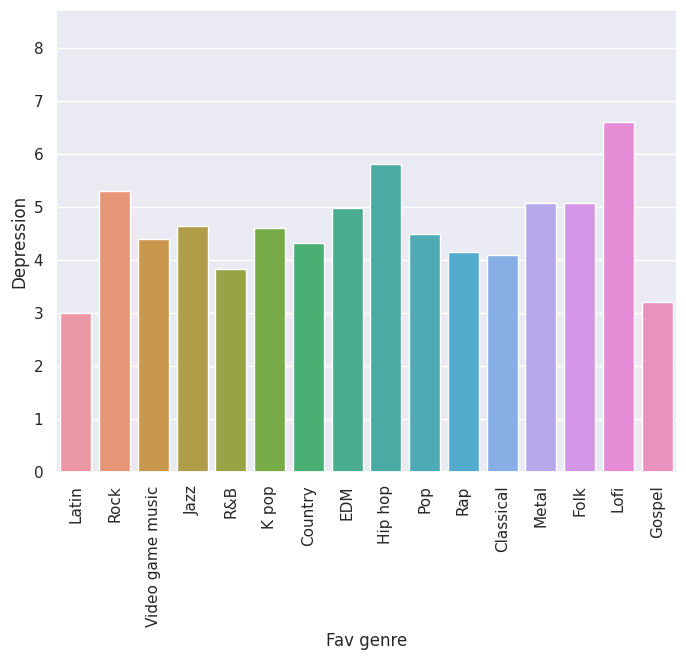

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['Fav genre'], y=data['Depression'], errwidth=0)
plt.xticks(rotation=90)